# FFT
https://blog.csdn.net/qq_27825451/article/details/88553441

In [45]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from scipy.fftpack import fft
import matplotlib.pyplot as plt
%matplotlib inline

def get_fft_values(y_values, T, N, f_s):
    f_values = np.linspace(0.0, 1.0/(2.0*T), N//2) # (1/2) * f_s 为原始信号的最大频率 
    fft_values_ = fft(y_values)
    fft_values = 2.0/N * np.abs(fft_values_[0:N//2]) # 归一化及取半处理，因为频谱是对称的
    return f_values, fft_values

t_n = 10 # 信号周期
N = 1000
T = t_n / N # 采样周期
f_s = 1/T # 采样频率，即每秒采样几个点，N/t_n

x_value = np.linspace(0,t_n,N) # 在10s内采样N个点
amplitudes = [4, 6, 8, 10, 14]
frequencies = [6.5, 5, 3, 1.5, 1]
y_values = [amplitudes[ii]*np.sin(2*np.pi*frequencies[ii]*x_value) for ii in range(0,len(amplitudes))] # 5个信号，每个信号长度为1000

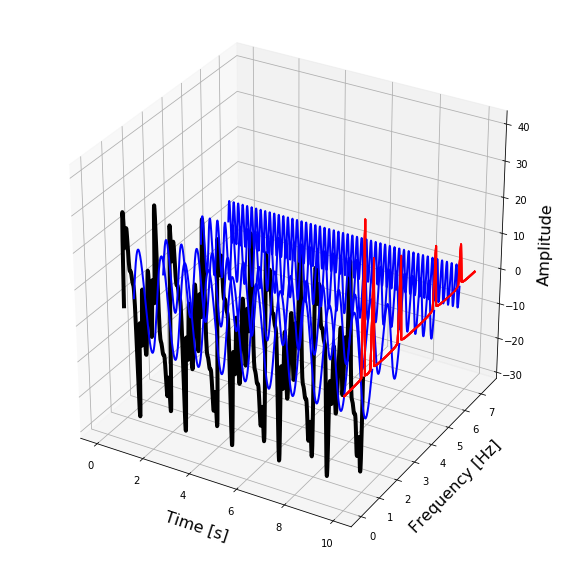

In [46]:
composite_y_value = np.sum(y_values, axis=0)

f_values, fft_values = get_fft_values(composite_y_value, T, N, f_s)
# print(fft_values)

colors = ['k', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b']

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel("\nTime [s]", fontsize=16)
ax.set_ylabel("\nFrequency [Hz]", fontsize=16)
ax.set_zlabel("\nAmplitude", fontsize=16)

y_values_ = [composite_y_value] + list(reversed(y_values))
frequencies = [1, 1.5, 3, 5, 6.5]

for ii in range(0,len(frequencies)):
    signal = y_values_[ii]
    color = colors[ii]
    length = signal.shape[0]
    x=np.linspace(0,10,1000) # 时域
    y=np.array([frequencies[ii]]*length) # 频率
    z=signal # 信号

    if ii == 0:
        linewidth = 4
    else:
        linewidth = 2
    ax.plot(list(x), list(y), list(z), linewidth=linewidth, color=color)

    x=[10]*75
    y=f_values[:75]
    z = fft_values[:75] * 3
    ax.plot(list(x), list(y), list(z), linewidth=2, color='red')
    
    plt.tight_layout()
plt.show()

# PSD 功率谱密度

# 自相关函数

# 通过信号变换构造特征

 ![image.png](attachment:image.png)

# 常用的滤波器
将时域信号转为频域信号，在频域信号中去除相应频率的信号，然后再逆转换为时域信号

In [47]:
# 低通滤波：去除高于某一阈值频率的信号
# 假设采样频率为1000hz,信号本身最大的频率为500hz，
# 要滤除400hz以上频率成分，即截至频率为400hz,则wn = 2 * 截止频率 / 采样频率 
# wn为归一化截止频率
from scipy import signal
# Butterworth digital and analog filter design
b, a = signal.butter(8, 0.8, "lowpass") # 低通滤波器，滤波器的阶数为8，一般阶数
                                        # 越大，得到的结果越精确，但计算效率也越低
                                        # b, a为滤波器传递函数的分子系数和分母系数
filted_data = signal.filtfilt(b, a, data) # 对信号data进行低通滤波

In [48]:
# 高通滤波：去除低于某一阈值频率的信号
# 假设采样频率为1000hz,信号本身最大的频率为500hz，
# 要滤除100hz以下频率成分，即截至频率为100hz,则wn=2*100/1000=0.2
b, a = signal.butter(8, 0.2, 'highpass')   #配置滤波器 8 表示滤波器的阶数
filted_data = signal.filtfilt(b, a, data)  #data为要过滤的信号

In [49]:
#  带通滤波：保留中间频率的信号
# 假设采样频率为1000hz,信号本身最大的频率为500hz，要滤除100hz以下，
# 400hz以上频率成分，即截至频率为100，400hz,则wn1=2*100/1000=0.2
# wn2=2*400/1000=0.8
b, a = signal.butter(8, [0.2,0.8], 'bandpass')   #配置滤波器 8 表示滤波器的阶数
filted_data = signal.filtfilt(b, a, data)  #data为要过滤的信号

In [50]:
# 带阻滤波：过滤掉中间频率的信号
# 假设采样频率为1000hz,信号本身最大的频率为500hz，
# 要滤除100hz以上，400hz以下频率成分，即截至频率为100，400hz
# wn1=2*100/1000=0.2， wn2=2*400/1000=0.8
b, a = signal.butter(8, [0.2,0.8], 'bandstop')   #配置滤波器 8 表示滤波器的阶数
filted_data = signal.filtfilt(b, a, data)  #data为要过滤的信号

AttributeError: 'numpy.ndarray' object has no attribute 'butter'

In [71]:
dirpath = "E:/human activity recognition/UCI HAR Dataset/train/Inertial Signals/"
filenames = ["test1.txt","test2.txt"]
train = []
for fn in filenames:
    with open(dirpath + filename, "r") as f:
        data = f.read().splitlines()
        data = map(lambda x: x.strip().split(), data)
        data = [list(map(float, line)) for line in data]
        data = np.array(data)
    train.append(data)
train = np.array(train)
train = np.transpose(train, [1,2,0])
train[0]

array([[ 1.808515e-04,  1.808515e-04],
       [ 1.013856e-02,  1.013856e-02],
       [ 9.275574e-03,  9.275574e-03],
       [ 5.065897e-03,  5.065897e-03],
       [ 1.081025e-02,  1.081025e-02],
       [ 4.045101e-03,  4.045101e-03],
       [ 4.757375e-03,  4.757375e-03],
       [ 6.213647e-03,  6.213647e-03],
       [ 3.306744e-03,  3.306744e-03],
       [ 7.571941e-03,  7.571941e-03],
       [ 5.407117e-03,  5.407117e-03],
       [ 6.221276e-03,  6.221276e-03],
       [ 6.895028e-03,  6.895028e-03],
       [ 4.610260e-03,  4.610260e-03],
       [ 7.331333e-03,  7.331333e-03],
       [ 5.077667e-03,  5.077667e-03],
       [ 5.762556e-03,  5.762556e-03],
       [ 6.692748e-03,  6.692748e-03],
       [ 5.443238e-03,  5.443238e-03],
       [ 8.240952e-03,  8.240952e-03],
       [ 6.506451e-03,  6.506451e-03],
       [ 6.531523e-03,  6.531523e-03],
       [ 7.422441e-03,  7.422441e-03],
       [ 5.771769e-03,  5.771769e-03],
       [ 6.240187e-03,  6.240187e-03],
       [ 4.622982e-03,  4